In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%tensorflow_version 1.14

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
import os
import random
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras import Input
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
# prepare data

path = '/content/drive/My Drive/Colab Notebooks/ANN/frame_data/'
train = pd.DataFrame(columns=['file', 'label', 'keypoints'])
val = pd.DataFrame(columns=['file', 'label', 'keypoints'])

files = os.listdir(path)
random.shuffle(files)
train_files, val_files = train_test_split(files, train_size=0.8)
print(train_files)
print(val_files)

for f_train in train_files:
  df_train = pd.read_csv(os.path.join(path, f_train))
  train = train.append(df_train)
train = train.reset_index(drop=True)

for f_val in val_files:
  df_val = pd.read_csv(os.path.join(path, f_val))
  val = val.append(df_val)
val = val.reset_index(drop=True)

X_train = np.zeros((len(train), 75))
for i in range(len(train)):
  X_train[i] = np.array(literal_eval(train['keypoints'][i]))
y_train = np.array(train.label)

X_val = np.zeros((len(val), 75))
for j in range(len(val)):
  X_val[j] = np.array(literal_eval(val['keypoints'][j]))
y_val = np.array(val.label)

print("X_train: %s    y_train: %s \nX_val: %s    y_val: %s " %(X_train.shape, y_train.shape, X_val.shape, y_val.shape))


['pick30.csv', 'walk14.csv', 'pick17.csv', 'other1.csv', 'pick9.csv', 'pick47.csv', 'other5.csv', 'other17.csv', 'walk4.csv', 'other4.csv', 'other89.csv', 'pick50.csv', 'other67.csv', 'wave4.csv', 'pick113.csv', 'pick8.csv', 'other63.csv', 'walk9.csv', 'pick94.csv', 'pick96.csv', 'other70.csv', 'pick105.csv', 'walk7.csv', 'wave9.csv', 'pick5.csv', 'other57.csv', 'pick104.csv', 'other24.csv', 'pick87.csv', 'pick89.csv', 'other41.csv', 'pick49.csv', 'pick32.csv', 'other12.csv', 'other23.csv', 'other28.csv', 'pick66.csv', 'walk12.csv', 'pick59.csv', 'other59.csv', 'other26.csv', 'walk6.csv', 'pick90.csv', 'other15.csv', 'other68.csv', 'other88.csv', 'walk3.csv', 'other91.csv', 'other74.csv', 'pick37.csv', 'pick115.csv', 'pick73.csv', 'other36.csv', 'pick85.csv', 'pick56.csv', 'other82.csv', 'pick86.csv', 'pick122.csv', 'other47.csv', 'pick88.csv', 'wave16.csv', 'pick121.csv', 'pick111.csv', 'pick14.csv', 'wave6.csv', 'pick31.csv', 'pick64.csv', 'pick106.csv', 'pick53.csv', 'walk5.csv', 'p

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 8)             8000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 8)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropo

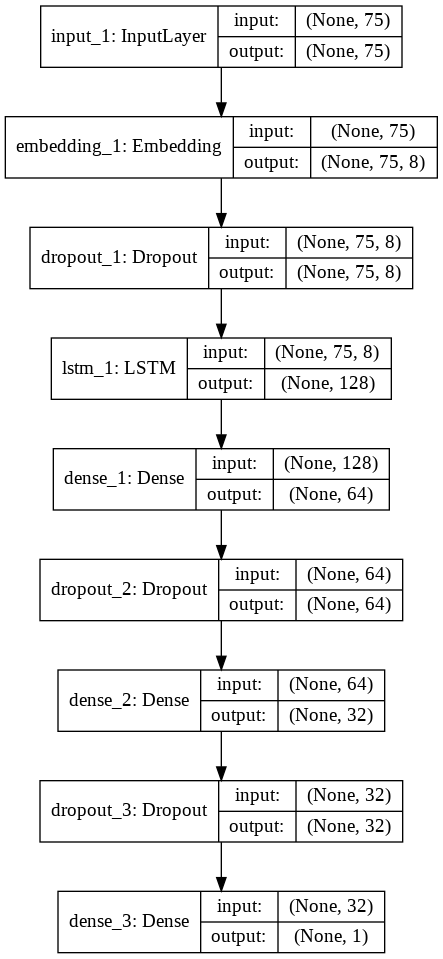

In [0]:
# build NN

inputs = Input(shape=(75,))
se1 = layers.Embedding(1000, 8, mask_zero=True)(inputs)
se2 = layers.Dropout(0.5)(se1)
se3 = layers.LSTM(128)(se2)
se4 = layers.Dense(64, activation='relu')(se3)
se5 = layers.Dropout(0.5)(se4)
se6 = layers.Dense(32, activation='relu')(se5)
se7 = layers.Dropout(0.5)(se6)
output = layers.Dense(1, activation='sigmoid')(se7)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/ANN/model3_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# train NN

history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 13052 samples, validate on 3670 samples
Epoch 1/20
13052/13052 [==============================] - 4s 292us/step - loss: 0.2494 - val_loss: 0.2370
Epoch 2/20
13052/13052 [==============================] - 3s 222us/step - loss: 0.2460 - val_loss: 0.2028
Epoch 3/20
13052/13052 [==============================] - 3s 222us/step - loss: 0.2091 - val_loss: 0.1946
Epoch 4/20
13052/13052 [==============================] - 3s 231us/step - loss: 0.1871 - val_loss: 0.1828
Epoch 5/20
13052/13052 [==============================] - 3s 226us/step - loss: 0.1745 - val_loss: 0.1824
Epoch 6/20
13052/13052 [==============================] - 3s 229us/step - loss: 0.1690 - val_loss: 0.1712
Epoch 7/20
13052/13052 [==============================] - 3s 235us/step - loss: 0.1682 - val_loss: 0.1735
Epoch 8/20
13052/13052 [==============================] - 3s 225us/step - loss: 0.1667 - val_loss: 0.1736
Epoch 9/20
13052/13052 [==============================] - 3s 234us/step - loss: 0.1636 - val_loss: 0.19

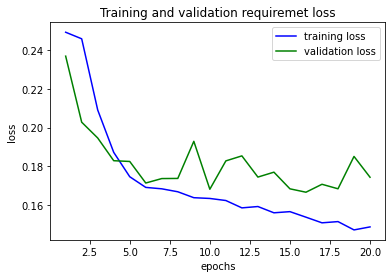

In [0]:
# Show loss

epochs = range(1,21)
plt.plot(epochs, history.history['loss'], 'b', label = 'training loss')
plt.plot(epochs, history.history['val_loss'], 'g', label = 'validation loss')
plt.title('Training and validation requiremet loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/ANN/model3-512_d0.5-val.h5')

In [0]:
X = np.concatenate((X_train, X_val), axis=0)
X.shape

(16722, 75)

In [0]:
y = np.concatenate((y_train, y_val))
y.shape

(16722,)

In [0]:
# train again with all data and 20 epoch

history = model.fit(X, y, epochs=6, batch_size=512)

model.save('/content/drive/My Drive/Colab Notebooks/ANN/model3-512_d0.5.h5')

Epoch 1/6
16722/16722 [==============================] - 3s 198us/step - loss: 0.1392
Epoch 2/6
16722/16722 [==============================] - 3s 194us/step - loss: 0.1391
Epoch 3/6
16722/16722 [==============================] - 4s 212us/step - loss: 0.1379
Epoch 4/6
16722/16722 [==============================] - 3s 195us/step - loss: 0.1375
Epoch 5/6
16722/16722 [==============================] - 3s 202us/step - loss: 0.1348
Epoch 6/6
16722/16722 [==============================] - 3s 192us/step - loss: 0.1358


Train on 13052 samples, validate on 3670 samples
Epoch 1/20
13052/13052 [==============================] - 7s 514us/step - loss: 0.2477 - val_loss: 0.2418
Epoch 2/20
13052/13052 [==============================] - 5s 405us/step - loss: 0.2052 - val_loss: 0.2208
Epoch 3/20
13052/13052 [==============================] - 5s 416us/step - loss: 0.1773 - val_loss: 0.1850
Epoch 4/20
13052/13052 [==============================] - 5s 417us/step - loss: 0.1725 - val_loss: 0.1883
Epoch 5/20
13052/13052 [==============================] - 6s 422us/step - loss: 0.1679 - val_loss: 0.1784
Epoch 6/20
13052/13052 [==============================] - 6s 422us/step - loss: 0.1617 - val_loss: 0.1578
Epoch 7/20
13052/13052 [==============================] - 5s 419us/step - loss: 0.1593 - val_loss: 0.1728
Epoch 8/20
13052/13052 [==============================] - 6s 448us/step - loss: 0.1567 - val_loss: 0.1780
Epoch 9/20
13052/13052 [==============================] - 6s 485us/step - loss: 0.1553 - val_loss: 0.16

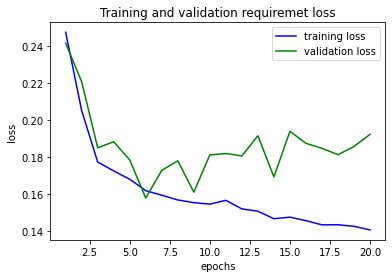

In [0]:
# build NN

inputs = Input(shape=(75,))
se1 = layers.Embedding(1000, 8, mask_zero=True)(inputs)
se2 = layers.Dropout(0.5)(se1)
se3 = layers.LSTM(128)(se2)
se4 = layers.Dense(64, activation='relu')(se3)
se5 = layers.Dropout(0.5)(se4)
se6 = layers.Dense(32, activation='relu')(se5)
se7 = layers.Dropout(0.5)(se6)
output = layers.Dense(1, activation='sigmoid')(se7)
model2 = Model(inputs=inputs, outputs=output)
model2.compile(optimizer='adam', loss='mse')


# train NN

history2 = model2.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val, y_val))

# Show loss

epochs = range(1,21)
plt.plot(epochs, history2.history['loss'], 'b', label = 'training loss')
plt.plot(epochs, history2.history['val_loss'], 'g', label = 'validation loss')
plt.title('Training and validation requiremet loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

model2.save('/content/drive/My Drive/Colab Notebooks/ANN/model3-256_d0.5-val.h5')

In [0]:
# train again with all data and 20 epoch

history2 = model2.fit(X, y, epochs=6, batch_size=256)

model2.save('/content/drive/My Drive/Colab Notebooks/ANN/model3-256_d0.5.h5')

Epoch 1/6
16722/16722 [==============================] - 6s 387us/step - loss: 0.1493
Epoch 2/6
16722/16722 [==============================] - 6s 374us/step - loss: 0.1431
Epoch 3/6
16722/16722 [==============================] - 6s 377us/step - loss: 0.1438
Epoch 4/6
16722/16722 [==============================] - 7s 392us/step - loss: 0.1410
Epoch 5/6
16722/16722 [==============================] - 7s 389us/step - loss: 0.1387
Epoch 6/6
16722/16722 [==============================] - 6s 378us/step - loss: 0.1370


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 75, 8)             8000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 8)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 75, 64)            18688     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 32)            2080      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0   

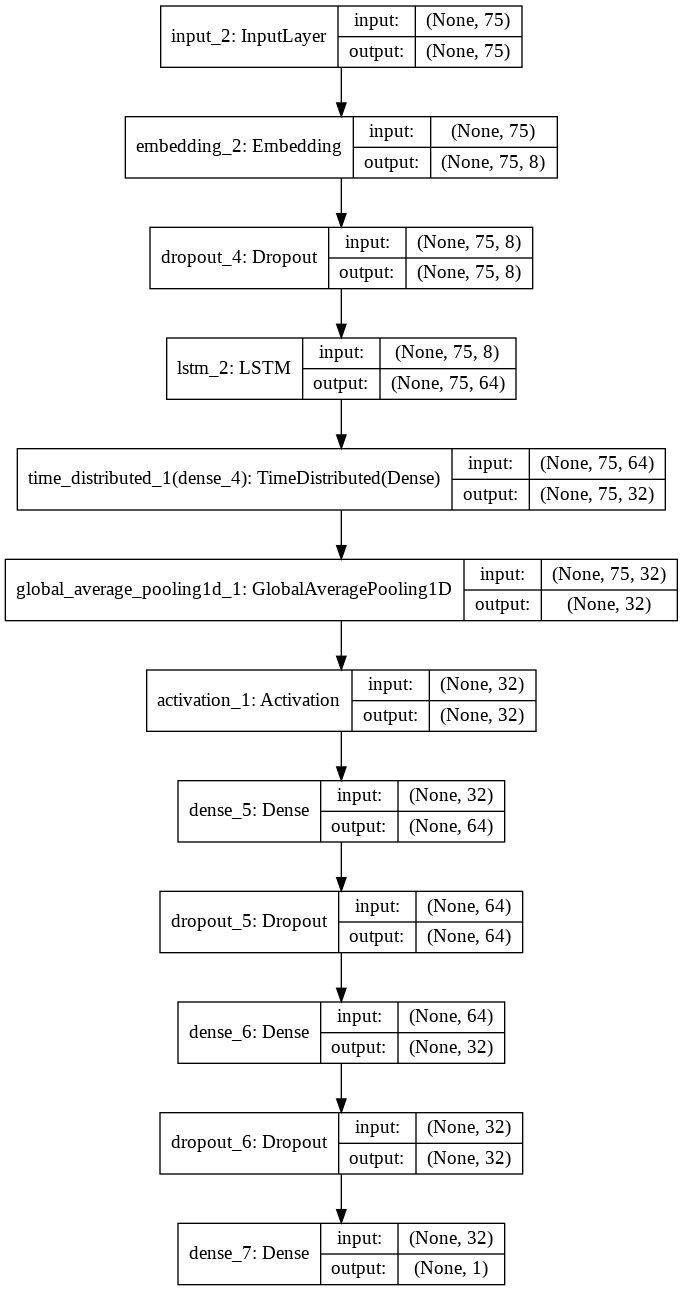

In [0]:
# build NN

inputs = Input(shape=(75,))
se1 = layers.Embedding(1000, 8, mask_zero=True)(inputs)
se2 = layers.Dropout(0.5)(se1)
se3 = layers.LSTM(64, return_sequences=True)(se2)
att = layers.TimeDistributed(layers.Dense(32, activation='relu'))(se3)
att = layers.GlobalAveragePooling1D()(att)
att = layers.Activation('relu')(att)
se4 = layers.Dense(64, activation='relu')(att)
se5 = layers.Dropout(0.5)(se4)
se6 = layers.Dense(32, activation='relu')(se5)
se7 = layers.Dropout(0.5)(se6)
output = layers.Dense(1, activation='sigmoid')(se7)
model3 = Model(inputs=inputs, outputs=output)
model3.compile(optimizer='adam', loss='mse')

model3.summary()
plot_model(model3, to_file='/content/drive/My Drive/Colab Notebooks/ANN/model3-2_plot.png', show_shapes=True, show_layer_names=True)


Train on 13052 samples, validate on 3670 samples
Epoch 1/20
13052/13052 [==============================] - 8s 619us/step - loss: 0.2489 - val_loss: 0.2364
Epoch 2/20
13052/13052 [==============================] - 6s 440us/step - loss: 0.2181 - val_loss: 0.2334
Epoch 3/20
13052/13052 [==============================] - 6s 432us/step - loss: 0.1970 - val_loss: 0.2237
Epoch 4/20
13052/13052 [==============================] - 6s 439us/step - loss: 0.1890 - val_loss: 0.2148
Epoch 5/20
13052/13052 [==============================] - 6s 424us/step - loss: 0.1801 - val_loss: 0.1970
Epoch 6/20
13052/13052 [==============================] - 6s 434us/step - loss: 0.1745 - val_loss: 0.1968
Epoch 7/20
13052/13052 [==============================] - 6s 449us/step - loss: 0.1730 - val_loss: 0.2051
Epoch 8/20
13052/13052 [==============================] - 5s 419us/step - loss: 0.1692 - val_loss: 0.1913
Epoch 9/20
13052/13052 [==============================] - 6s 463us/step - loss: 0.1688 - val_loss: 0.19

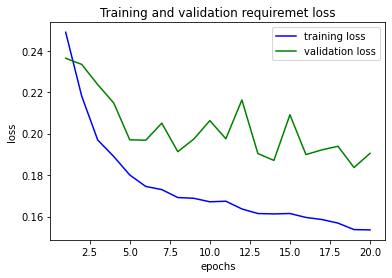

In [0]:
# train NN

history3 = model3.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val, y_val))

# Show loss

epochs = range(1,21)
plt.plot(epochs, history3.history['loss'], 'b', label = 'training loss')
plt.plot(epochs, history3.history['val_loss'], 'g', label = 'validation loss')
plt.title('Training and validation requiremet loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

model3.save('/content/drive/My Drive/Colab Notebooks/ANN/model3-2-val.h5')

In [0]:
# train again with all data and 20 epoch

history3 = model3.fit(X, y, epochs=6, batch_size=256)

model2.save('/content/drive/My Drive/Colab Notebooks/ANN/model3-2.h5')

Epoch 1/6
16722/16722 [==============================] - 6s 385us/step - loss: 0.1627
Epoch 2/6
16722/16722 [==============================] - 6s 380us/step - loss: 0.1587
Epoch 3/6
16722/16722 [==============================] - 7s 427us/step - loss: 0.1545
Epoch 4/6
16722/16722 [==============================] - 7s 419us/step - loss: 0.1553
Epoch 5/6
16722/16722 [==============================] - 7s 395us/step - loss: 0.1515
Epoch 6/6
16722/16722 [==============================] - 7s 411us/step - loss: 0.1494
